In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
cd db/

C:\Users\arouhi\Py\PR\db


In [134]:
URM_train=pd.read_csv('data_train.csv')
R_test=pd.read_csv('data_target_users_test.csv')


In [5]:
URM=pd.read_csv('data_train.csv')
URM_tuples = [tuple(x) for x in URM.to_numpy()]


In [6]:
userList, itemList, ratingList = zip(*URM_tuples)

userList = list(userList)
userList=np.array(userList,dtype=np.int64)
itemList = list(itemList)
itemList=np.array(itemList,dtype=np.int64)

ratingList = list(ratingList)                        #not needed
ratingList=np.array(ratingList,dtype=np.int64)       #not needed





In [7]:
len(ratingList)-np.count_nonzero(ratingList)

0

In [8]:
itemList

array([10080, 19467,  2665, ..., 21384,  8699, 19178], dtype=int64)

In [9]:
userList_unique = list(set(userList))
itemList_unique = list(set(itemList))

numUsers = len(userList_unique)
numItems = len(itemList_unique)

numberInteractions= len(URM_tuples)
print ("Number of items\t {}, Number of users\t {}".format(numItems, numUsers))
print("Number of Intraction \t {}" .format(numberInteractions))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemList_unique), max(userList_unique)))
print ("Average interactions per user {:.2f}".format(numberInteractions/numUsers))
print ("Average interactions per item {:.2f}\n".format(numberInteractions/numItems))

print ("Sparsity {:.2f} %".format((1-float(numberInteractions)/(numItems*numUsers))*100))

Number of items	 24896, Number of users	 7947
Number of Intraction 	 113268
Max ID items	 25974, Max Id users	 7946

Average interactions per user 14.25
Average interactions per item 4.55

Sparsity 99.94 %


To store the data we use a sparse matrix. We build it as a COO matrix and then change its format
The COO constructor expects (data, (row, column))

In [10]:

import scipy.sparse as sps

URM_all = sps.coo_matrix((ratingList, (userList, itemList)))

URM_all

<7947x25975 sparse matrix of type '<class 'numpy.int64'>'
	with 113268 stored elements in COOrdinate format>

In [11]:
URM_all.tocsr()

<7947x25975 sparse matrix of type '<class 'numpy.int64'>'
	with 113268 stored elements in Compressed Sparse Row format>

** Item popularity
**

In [12]:
import numpy as np

itemPopularity = (URM_all>0).sum(axis=0)
itemPopularity

matrix([[2, 3, 5, ..., 1, 1, 2]], dtype=int32)

In [13]:
itemPopularity = np.array(itemPopularity).squeeze()
itemPopularity

array([2, 3, 5, ..., 1, 1, 2], dtype=int32)

In [14]:
itemPopularity = np.sort(itemPopularity)
itemPopularity

array([  0,   0,   0, ..., 219, 234, 393], dtype=int32)

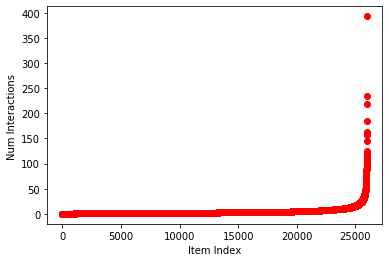

In [15]:

import matplotlib.pyplot as pyplot

pyplot.plot(itemPopularity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Item Index')
pyplot.show()

In [16]:
tenPercent = int(numItems/10)
print(tenPercent)
print("Average per-item interactions over the whole dataset {:.2f}".
      format(itemPopularity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(itemPopularity[-tenPercent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(itemPopularity[:tenPercent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(itemPopularity[int(numItems*0.45):int(numItems*0.55)].mean()))
print("Average per-item interactions for the 10 most popular items {:.2f}".
      format(itemPopularity[-10:].mean()))


2489
Average per-item interactions over the whole dataset 4.36
Average per-item interactions for the top 10% popular items 19.32
Average per-item interactions for the least 10% popular items 0.57
Average per-item interactions for the median 10% popular items 2.17
Average per-item interactions for the 10 most popular items 185.60


In [17]:
print(itemPopularity[-10:])


[115 120 126 145 157 162 185 219 234 393]


In [18]:
print("Number of items with zero interactions {}".
      format(np.sum(itemPopularity==0)))

Number of items with zero interactions 1079


In [19]:
itemPopularityNonzero = itemPopularity[itemPopularity>0]           

tenPercent = int(len(itemPopularityNonzero)/10)

print("Average per-item interactions over the whole dataset {:.2f}".
      format(itemPopularityNonzero.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(itemPopularityNonzero[-tenPercent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(itemPopularityNonzero[:tenPercent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(itemPopularityNonzero[int(numItems*0.45):int(numItems*0.55)].mean()))

Average per-item interactions over the whole dataset 4.55
Average per-item interactions for the top 10% popular items 19.32
Average per-item interactions for the least 10% popular items 1.00
Average per-item interactions for the median 10% popular items 2.60


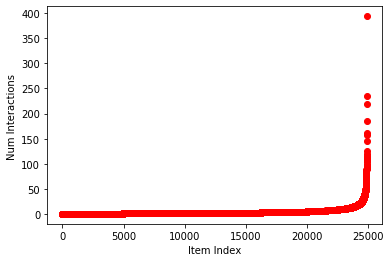

In [20]:

pyplot.plot(itemPopularityNonzero, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Item Index')
pyplot.show()

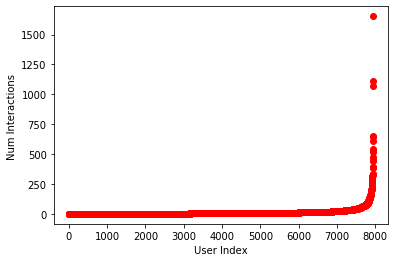

In [21]:

userActivity = (URM_all>0).sum(axis=1)
userActivity = np.array(userActivity).squeeze()
userActivity = np.sort(userActivity)


pyplot.plot(userActivity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('User Index')
pyplot.show()

Now that we have the data, we can build our first recommender. We need two things:
a 'fit' function to train our model
a 'recommend' function that uses our model to recommend
Let's start with a random recommender
In a random recommend we don't have anything to learn from the data

In [21]:
class RandomRecommender(object):

    def fit(self, URM_train):
           
        self.numItems = URM_train.shape[1]    #wtf?
    
    
    def recommend(self, user_id, at=5):
    
        recommended_items = np.random.choice(self.numItems, at)

        return recommended_items

In [22]:
train_test_split = 0.85

numInteractions = URM_all.nnz


train_mask = np.random.choice([True,False], numInteractions, p=[train_test_split, 1-train_test_split])
train_mask

array([ True, False,  True, ...,  True,  True, False])

In [23]:
userList = np.array(userList)
itemList = np.array(itemList)
ratingList = np.array(ratingList)


URM_train = sps.coo_matrix((ratingList[train_mask], (userList[train_mask], itemList[train_mask])))   #changed variable specification
URM_train = URM_train.tocsr()
URM_train

<7947x25975 sparse matrix of type '<class 'numpy.longlong'>'
	with 96183 stored elements in Compressed Sparse Row format>

In [24]:
test_mask = np.logical_not(train_mask)

URM_test = sps.coo_matrix((ratingList[test_mask], (userList[test_mask], itemList[test_mask])))
URM_test = URM_test.tocsr()
URM_test

<7947x25975 sparse matrix of type '<class 'numpy.longlong'>'
	with 17085 stored elements in Compressed Sparse Row format>

**Evaluation metric¶
**

In [25]:
user_id = userList_unique[1]
user_id

1

In [26]:
randomRecommender = RandomRecommender()
randomRecommender.fit(URM_train)

recommended_items = randomRecommender.recommend(user_id, at=10)
recommended_items

array([18253,  2032,  4481, 15920,  3553, 18082,  4340, 14689, 13862,
       17699])

We call items in the test set 'relevant'¶


In [27]:
relevant_items = URM_test[user_id].indices
relevant_items

array([20146], dtype=int32)

In [28]:
is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
is_relevant

array([False, False, False, False, False, False, False, False, False,
       False])

**Precision: how many of the recommended items are relevant¶**


In [29]:
def precision(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    precision_score = np.sum(is_relevant, dtype=np.float32) / len(is_relevant)
    
    return precision_score

In [30]:
def MAP(recommended_items, relevant_items):
   
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    # Cumulative sum: precision at 1, at 2, at 3 ...
    p_at_k = is_relevant * np.cumsum(is_relevant, dtype=np.float32) / (1 + np.arange(is_relevant.shape[0]))
    
    map_score = np.sum(p_at_k) / np.min([relevant_items.shape[0], is_relevant.shape[0]])

    return map_score

In [31]:
def evaluate_algorithm(URM_test, recommender_object, at=5):
    
    cumulative_precision = 0.0
    cumulative_recall = 0.0
    cumulative_MAP = 0.0
    
    num_eval = 0


    for user_id in userList_unique:

        relevant_items = URM_test[user_id].indices
        
        if len(relevant_items)>0:
            
            recommended_items = recommender_object.recommend(user_id, at=at)
            num_eval+=1

            cumulative_precision += precision(recommended_items, relevant_items)
            cumulative_MAP += MAP(recommended_items, relevant_items)


    cumulative_precision /= num_eval
    cumulative_MAP /= num_eval
    
    print("Recommender performance is: Precision = {:.4f}, MAP = {:.4f}".format(
        cumulative_precision, cumulative_MAP))

In [22]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

Let's use the DataReader provided with the course repo

In [23]:
from Data_manager.Movielens.Movielens10MReader import Movielens10MReader
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [24]:
#dataReader = Movielens10MReader()
#dataset = dataReader.load_data()

#URM_all = dataset.get_URM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

# Item-based Collaborative Filtering

In [88]:
from Base.Similarity.Compute_Similarity_Python import Compute_Similarity_Python
import numpy as np

class ItemKNNCFRecommender(object):
    
    def __init__(self, URM):
        self.URM = URM
        
            
    def fit(self, topK=10, shrink=10, normalize=True, similarity="cosine"):
        
        similarity_object = Compute_Similarity_Python(self.URM, shrink=shrink, 
                                                  topK=topK, normalize=normalize, 
                                                  similarity = similarity)
        
        self.W_sparse = similarity_object.compute_similarity()

        
    def recommend(self, user_id, at=None, exclude_seen=True):
        # compute the scores using the dot product
        user_profile = self.URM[user_id]
        scores = user_profile.dot(self.W_sparse).toarray().ravel()

        if exclude_seen:
            scores = self.filter_seen(user_id, scores)

        # rank items
        ranking = scores.argsort()[::-1]
            
        return ranking[:at]
    
    
    def filter_seen(self, user_id, scores):

        start_pos = self.URM.indptr[user_id]
        end_pos = self.URM.indptr[user_id+1]

        user_profile = self.URM.indices[start_pos:end_pos]
        
        scores[user_profile] = -np.inf

        return scores

## Test our CF recommender:

In [90]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=10, topK=10)

Similarity column 25975 ( 100 % ), 2297.32 column/sec, elapsed time 0.19 min


In [50]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=10, topK=10)
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
MAP_per_k.append(result_dict[10]["MAP"]) # 0.02884342539676257 = map , cosine, c = 10, k = 10 

ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2581.60 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.94 sec. Users per second: 1427


In [111]:
import numpy as np

In [146]:
l = np.array(R_test).shape[0]
for r in range(l):
    output = recommender.recommend(R_test.iloc[r][0], at=10)
    R_test['item_list'][r] = np.array_str(output)[1:-1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [147]:
R_test

,user_id,item_list
0,0,11310 445 8661 8651 8652 8653 8654 865...
1,1,23600 12409 23244 20173 20095 16118 21442 1631...
2,2,3164 14031 9549 14792 575 11548 17336 2597...
3,3,12473 13689 2074 2442 88 6649 9528 774...
4,4,1611 14012 9312 9007 1447 3318 21537 1106...
...,...,...
7939,7942,25755 16139 478 16848 3462 5298 10528 237...
7940,7943,14137 20368 19874 3525 9008 25241 4911 1841...
7941,7944,10959 10689 25400 12594 5412 8304 3068 497...
7942,7945,8341 1610 5343 21590 7313 8937 23806 1475...


In [118]:
lst= recommender.recommend(R_test.iloc[1][0], at=10)

In [121]:
np.array_str(lst)[1:-1]

'23600 12409 23244 20173 20095 16118 21442 16318  8431 14047'

In [ ]:
lst.ar

In [106]:
np.array(R_test).shape[0]

7944

In [92]:
res=[]


array([ 8097,  7494,  7013, ..., 20127,  9658,   814], dtype=int64)

In [84]:
recommender.recommend(5,10)

[17316, 17317, 17313, 17314, 17315, 17311, 17320, 17319, 17309, 17318]

## Remember to keep the URM in CSR format!

## Parameter tuning

#### Once we have built our model we can play with its parameters
* Number of neighbors
* Shrinkage
* Similarity type

#### Number of neighbors

In [45]:
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender

x_tick = [2,5,10, 50, 100, 200, 500]
MAP_per_k = []

for topK in x_tick:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=0.0, topK=topK)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2499.86 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.78 sec. Users per second: 1486
ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2627.30 column/sec, elapsed time 0.16 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.94 sec. Users per second: 1425
ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2596.31 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.93 se

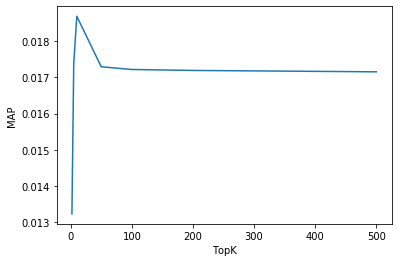

In [46]:
pyplot.plot(x_tick, MAP_per_k)
pyplot.ylabel('MAP')
pyplot.xlabel('TopK')
pyplot.show()

In [35]:
#Best K=10

#### On this dataset the number of neighbors has a great impact on MAP.

#### Different datasets will behave in different ways.

### Shrinkage

In [47]:
x_tick = [0, 10, 50, 100, 200, 500]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=shrink, topK=10)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2515.59 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.90 sec. Users per second: 1438
ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2542.93 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.90 sec. Users per second: 1440
ItemKNNCFRecommender: URM Detected 234 (2.94 %) cold users.
ItemKNNCFRecommender: URM Detected 4057 (15.62 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2555.19 column/sec, elapsed time 0.17 min
EvaluatorHoldout: Processed 5616 ( 100.00% ) in 3.82 se

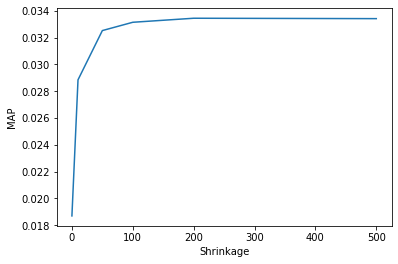

In [48]:
pyplot.plot(x_tick, MAP_per_shrinkage)
pyplot.ylabel('MAP')
pyplot.xlabel('Shrinkage')
pyplot.show()#10

### Comparing different similarity heuristics

#### Let's see how different are the similarities 